In [153]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [154]:
# 3.Global collection of hurricanes
# "usecols=range(17)" extracts the first 17 columns, and skip row[1] which has no useful information.
# "na_values" means replace"NAN" for "NOT_NAMED" in column"NAME"
df3 = pd.read_csv("ibtracs.ALL.list.v04r00.csv",
                 usecols=range(17),
                 skiprows=[1], 
                 parse_dates=["ISO_TIME"],
                 na_values=["NOT_NAMED", "NAME"])
df3.head()

C:\Users\60918\AppData\Local\Temp\ipykernel_18528\62237464.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv("ibtracs.ALL.list.v04r00.csv",


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,,,,main,43,0,__________O___
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,,,,main,0,0,__________P___
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,,,,main,0,0,__________P___
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,,,,main,0,0,__________P___
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,,,,main,0,0,__________O___


In [155]:
# 3.1 
# Select those rows with WMO_WIND information
df3_1 = df3[df3["WMO_WIND"]!= " "] 
df3_1["WMO_WIND"]=df3_1["WMO_WIND"].astype(int)
# Find out the largest wind speed for each hurricanes groupby"SID" and "NAME", inspired by Wenting Yuan
WMO_WIND_max=df3_1.groupby(["SID","NAME"])["WMO_WIND"].max()
# Sort the hurricanes according to "WMO_WIND_max" in a descending order, and list the top 10 hurricanes
WMO_WIND_max.sort_values(ascending=False).head(10)

C:\Users\60918\AppData\Local\Temp\ipykernel_18528\684648275.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_1["WMO_WIND"]=df3_1["WMO_WIND"].astype(int)


SID            NAME    
2015293N13266  PATRICIA    185
1980214N11330  ALLEN       165
1988253N12306  GILBERT     160
2005289N18282  WILMA       160
1997253N12255  LINDA       160
2019236N10314  DORIAN      160
2009288N07267  RICK        155
2017242N16333  IRMA        155
2005261N21290  RITA        155
1998295N12284  MITCH       155
Name: WMO_WIND, dtype: int32

Text(0, 0.5, 'WMO_WIND_max')

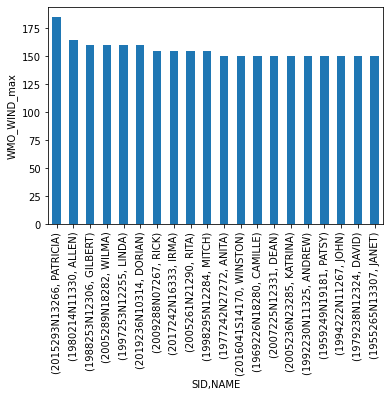

In [156]:
# 3.2
# Stepped by 3.1, list the top 20 hurricanes with largest WMO_WIND and make a bar chart
WMO_WIND_max.sort_values(ascending=False).head(20).plot(kind='bar')
plt.xlabel("SID,NAME")
plt.ylabel("WMO_WIND_max")

Text(0, 0.5, 'Datapoints_number')

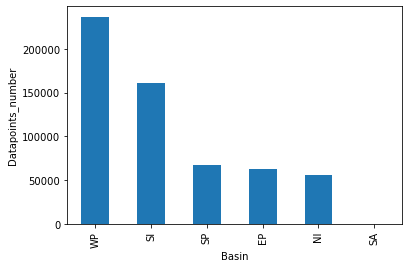

In [157]:
# 3.3
# Count the datapoints by Basin and make a bar chart
df3["BASIN"].value_counts().plot(kind="bar")
plt.xlabel("Basin")
plt.ylabel("Datapoints_number")

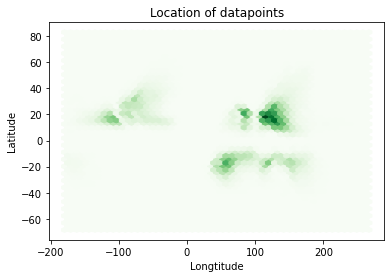

In [158]:
# 3.4  
# Make a hexbin plot of the location of datapoints in Latitude and Longitude.
x = df3["LON"]
y = df3["LAT"] 
plt.hexbin(x, y, gridsize = 50, cmap ='Greens') 
plt.title('Location of datapoints') 
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show() 

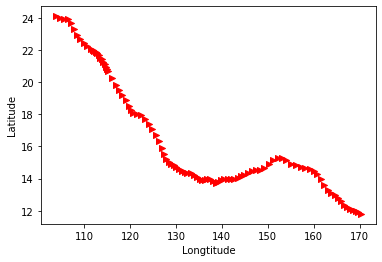

In [159]:
# 3.5 
# Find the data of Typhoon Mangkhut (from 2018)
df3_5=df3.loc[(df3["NAME"]=="MANGKHUT")&(df3["SEASON"]>=2018)]
# Plot its track as a scatter plot, based on latitude and longtitude
x = df3_5["LON"]
y = df3_5["LAT"] 
plt.scatter(x, y,c="r",marker='>')
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show()

In [160]:
# 3.6
# Create a new dataframe df3_6 that contains only data since 1970 from "WP" and "EP" Basin
df3["Year"]=pd.to_datetime(df3["ISO_TIME"]).dt.year.astype(int)
df3["Month"]=pd.to_datetime(df3["ISO_TIME"]).dt.month.astype(int)
df3["Day"]=pd.to_datetime(df3["ISO_TIME"]).dt.day.astype(int)
df3_6=df3.loc[((df3["BASIN"]=="EP")|(df3["BASIN"]=="WP"))&(df3["Year"]>=1970)]
# Generate new indexes for df3_6
df3_6.reset_index(drop=True, inplace=True)
df3_6

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG,Year,Month,Day
0,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 00:00:00,TS,7.00000,151.400,,1006,tokyo,main,1088,1088,_OO___________,1970,2,19
1,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 03:00:00,TS,7.24752,151.205,,,,main,1109,1109,_PP___________,1970,2,19
2,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 06:00:00,TS,7.50000,151.000,,1002,tokyo,main,1143,1143,_OO___________,1970,2,19
3,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 09:00:00,TS,7.75747,150.772,,,,main,1171,1168,_PP___________,1970,2,19
4,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 12:00:00,TS,8.00000,150.500,,998,tokyo,main,1182,1179,_OO___________,1970,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176347,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 15:00:00,TS,13.99570,-90.294,,,,PROVISIONAL,0,0,P_____________,2022,10,10
176348,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 18:00:00,NR,14.50000,-91.000,,,,PROVISIONAL,0,,O_____________,2022,10,10
176349,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 12:00:00,NR,15.20000,151.300,,,,PROVISIONAL,1985,1974,O_____________,2022,10,12
176350,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 15:00:00,NR,15.05000,151.325,,,,PROVISIONAL,1974,1952,P_____________,2022,10,12


Text(0, 0.5, 'Datapoints_number')

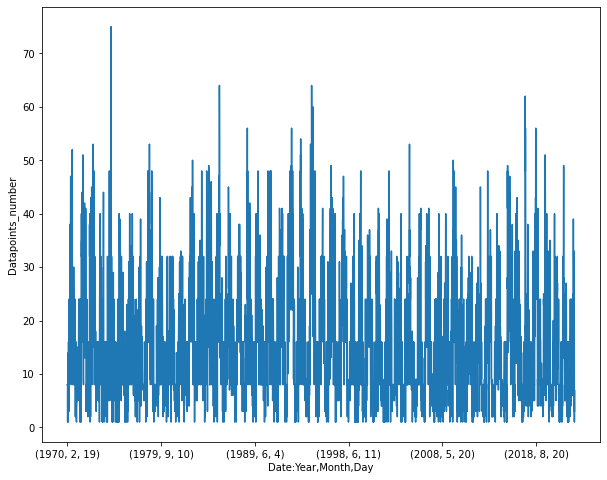

In [161]:
# 3.7
# Plot the number of datapoints per day.
df3_6.groupby(["Year","Month","Day"])["Day"].count().plot(figsize=(10, 8))
plt.xlabel("Date:Year,Month,Day")
plt.ylabel("Datapoints_number")

In [162]:
# 3.8
# Detect whether a certain year is Leap Year or Normal Year
df3_6["Leap_Year"]=False
df3_6["Leap_Year"][(df3_6["Year"]%100==0)&(df3_6["Year"]%400==0)]=True
df3_6["Leap_Year"][(df3_6["Year"]%100!=0)&(df3_6["Year"]%4==0)]=True
# Inspired from https://nsidc.org/data/user-resources/help-center/day-year-doy-calendar#anchor-2
# Create a new column"Day_of_year" and initialize with 0
df3_6["Day_of_year"]=0
# Assume the year is Leap year,"Day_of_year" is equal to df3_6["Day"] plus days_number of each month before. 
df3_6["Day_of_year"][df3_6["Month"]==1]=df3_6["Day"]
df3_6["Day_of_year"][df3_6["Month"]==2]=31+df3_6["Day"]
df3_6["Day_of_year"][df3_6["Month"]==3]=31+29+df3_6["Day"]
df3_6["Day_of_year"][df3_6["Month"]==4]=31+29+31+df3_6["Day"]
df3_6["Day_of_year"][df3_6["Month"]==5]=31+29+31+30+df3_6["Day"]
df3_6["Day_of_year"][df3_6["Month"]==6]=31+29+31+30+31+df3_6["Day"]
df3_6["Day_of_year"][df3_6["Month"]==7]=31+29+31+30+31+30+df3_6["Day"]
df3_6["Day_of_year"][df3_6["Month"]==8]=31+29+31+30+31+30+31+df3_6["Day"]
df3_6["Day_of_year"][df3_6["Month"]==9]=31+29+31+30+31+30+31+31+df3_6["Day"]
df3_6["Day_of_year"][df3_6["Month"]==10]=31+29+31+30+31+30+31+31+30+df3_6["Day"]
df3_6["Day_of_year"][df3_6["Month"]==11]=31+29+31+30+31+30+31+31+30+31+df3_6["Day"]
df3_6["Day_of_year"][df3_6["Month"]==12]=31+29+31+30+31+30+31+31+30+31+30+df3_6["Day"]
# If the year is Normal year and "Month" is larger than 2,"Day_of_year" is equal to the equations above minus 1. 
df3_6["Day_of_year"][(df3_6["Month"]>2)&(df3_6["Leap_Year"]==False)]=df3_6["Day_of_year"]-1
# Create a new column"cDayofyear", connecting"Year" and "Day_of_year" with"-".
df3_6["cDayofyear"]=df3_6["Year"].astype(str)+"-"+df3_6["Day_of_year"].astype(str)
df3_6

C:\Users\60918\AppData\Local\Temp\ipykernel_18528\3755639227.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_6["Leap_Year"]=False
C:\Users\60918\AppData\Local\Temp\ipykernel_18528\3755639227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_6["Leap_Year"][(df3_6["Year"]%100==0)&(df3_6["Year"]%400==0)]=True
C:\Users\60918\AppData\Local\Temp\ipykernel_18528\3755639227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG,Year,Month,Day,Leap_Year,Day_of_year,cDayofyear
0,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 00:00:00,TS,7.00000,151.400,...,main,1088,1088,_OO___________,1970,2,19,False,50,1970-50
1,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 03:00:00,TS,7.24752,151.205,...,main,1109,1109,_PP___________,1970,2,19,False,50,1970-50
2,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 06:00:00,TS,7.50000,151.000,...,main,1143,1143,_OO___________,1970,2,19,False,50,1970-50
3,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 09:00:00,TS,7.75747,150.772,...,main,1171,1168,_PP___________,1970,2,19,False,50,1970-50
4,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 12:00:00,TS,8.00000,150.500,...,main,1182,1179,_OO___________,1970,2,19,False,50,1970-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176347,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 15:00:00,TS,13.99570,-90.294,...,PROVISIONAL,0,0,P_____________,2022,10,10,False,283,2022-283
176348,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 18:00:00,NR,14.50000,-91.000,...,PROVISIONAL,0,,O_____________,2022,10,10,False,283,2022-283
176349,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 12:00:00,NR,15.20000,151.300,...,PROVISIONAL,1985,1974,O_____________,2022,10,12,False,285,2022-285
176350,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 15:00:00,NR,15.05000,151.325,...,PROVISIONAL,1974,1952,P_____________,2022,10,12,False,285,2022-285


In [163]:
# 3.8 Connected above
# Define "Day_of_Year_datapointcount" to count the datapoints groupby"cDayofyear"
Day_of_Year_datapointcount=df3_6.groupby(["cDayofyear"])["SID"].count()
# Define "Day_No" to display"Day_of_year"
Day_No=df3_6.groupby(["cDayofyear"])["Day_of_year"].mean()
# Use function concat() to connect "Day_of_Year_datapointcount" and "Day_No" and make a new dataframe df3_6new.
# Discussed with Wenting Yuan.
df3_6new=pd.concat([Day_of_Year_datapointcount,Day_No],axis=1).reset_index()
df3_6new
# Notice:The row sequence of output is not decided by the Day_of_year in an ascending order,
# but decided by the string of df3_6new["cDayofyear"].str[0:6] of each item.

,cDayofyear,SID,Day_of_year
0,1970-150,4,150.0
1,1970-151,8,151.0
2,1970-152,8,152.0
3,1970-153,8,153.0
4,1970-154,8,154.0
...,...,...,...
10812,2022-89,2,89.0
10813,2022-90,1,90.0
10814,2022-97,8,97.0
10815,2022-98,8,98.0


Text(0, 0.5, 'Datapoints_number')

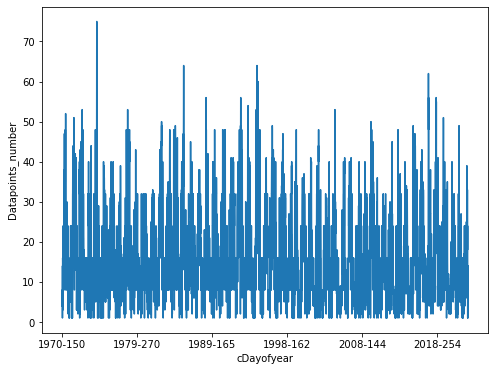

In [164]:
# 3.8 Connected above
# Considering the "Year" factor, calculate the datapoint counts of "Day_of_year".
Day_of_Year_datapointcount.plot(figsize=(8, 6))
plt.ylabel("Datapoints_number")

Text(0, 0.5, 'Datapoints_number')

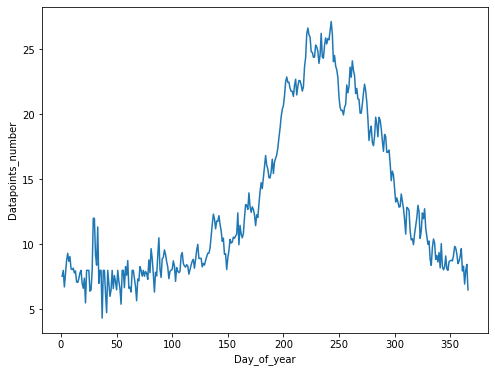

In [165]:
# 3.8 Connected above
# Without considering the "Year" factor, calculate the datapoint counts of "Day_of_year".
df3_6new.groupby(["Day_of_year"])["SID"].mean().plot(figsize=(8, 6))
plt.ylabel("Datapoints_number")

C:\Users\60918\AppData\Local\Temp\ipykernel_18528\345763433.py:13: RuntimeWarning: invalid value encountered in double_scalars
  df3_6new.iloc[i,3]=(df3_6new.iloc[i,1]-Mean)/STD
C:\Users\60918\AppData\Local\Temp\ipykernel_18528\345763433.py:13: RuntimeWarning: invalid value encountered in double_scalars
  df3_6new.iloc[i,3]=(df3_6new.iloc[i,1]-Mean)/STD
C:\Users\60918\AppData\Local\Temp\ipykernel_18528\345763433.py:13: RuntimeWarning: invalid value encountered in double_scalars
  df3_6new.iloc[i,3]=(df3_6new.iloc[i,1]-Mean)/STD
C:\Users\60918\AppData\Local\Temp\ipykernel_18528\345763433.py:13: RuntimeWarning: invalid value encountered in double_scalars
  df3_6new.iloc[i,3]=(df3_6new.iloc[i,1]-Mean)/STD
C:\Users\60918\AppData\Local\Temp\ipykernel_18528\345763433.py:13: RuntimeWarning: invalid value encountered in double_scalars
  df3_6new.iloc[i,3]=(df3_6new.iloc[i,1]-Mean)/STD
C:\Users\60918\AppData\Local\Temp\ipykernel_18528\345763433.py:13: RuntimeWarning: invalid value encountered i

<AxesSubplot:xlabel='cDayofyear'>

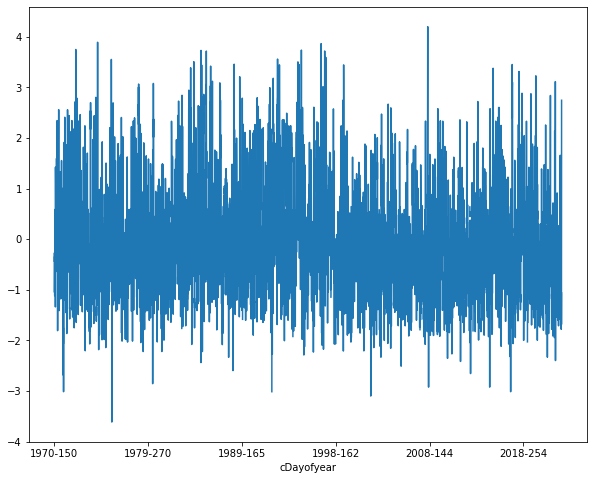

In [166]:
# 3.9
# Add a new column"Anomaly" to calculate the anomaly of daily counts. 
# Initialize column"Anomaly" with 0.
df3_6new["Anomaly"]=0
# Refill the column"Anomaly" line by line. 
for i in range(10817):
    # Inspired from https://datalab.marine.rutgers.edu/2020/11/introduction-to-python-data-analysis/
    # x.Anomaly= (x - x.mean())/x.std()
    # Calculate Mean and STD for each item in column"SID",based on the statistical sample set "loc[df3_6new.iloc[i,2]]", decided by column[2]
    Mean=df3_6new.groupby(["Day_of_year"])["SID"].mean().loc[df3_6new.iloc[i,2]]
    STD=df3_6new.groupby(["Day_of_year"])["SID"].std().loc[df3_6new.iloc[i,2]]
    # Calculate Anomaly for each item in column"SID"
    df3_6new.iloc[i,3]=(df3_6new.iloc[i,1]-Mean)/STD
# Plot the anomaly of daily counts 
df3_6new.groupby(["cDayofyear"])["Anomaly"].mean().plot(figsize=(10, 8))

YEAR
1970    0.048483
1971    0.357574
1972    0.235409
1973   -0.350730
1974    0.009890
1975   -0.171379
1976    0.019000
1977   -0.449941
1978    0.311556
1979   -0.234873
1980   -0.221975
1981   -0.208934
1982    0.356929
1983   -0.020931
1984    0.206866
1985    0.584772
1986    0.341109
1987   -0.129513
1988    0.026122
1989    0.149795
1990    0.359149
1991    0.260085
1992    0.840041
1993    0.128541
1994    0.720214
1995   -0.066558
1996    0.351666
1997    0.412123
1998   -0.423470
1999   -0.322442
2000   -0.134880
2001   -0.295877
2002   -0.224028
2003   -0.245649
2004   -0.074557
2005   -0.420141
2006   -0.206849
2007   -0.360783
2008   -0.344157
2009    0.342921
2010   -0.576682
2011   -0.320884
2012   -0.270602
2013   -0.115684
2014   -0.155936
2015    0.359668
2016   -0.039883
2017   -0.239413
2018    0.276804
2019   -0.007518
2020   -0.388445
2021   -0.397893
2022   -0.399017
Name: Anomaly, dtype: float64


Text(0, 0.5, 'Anomaly')

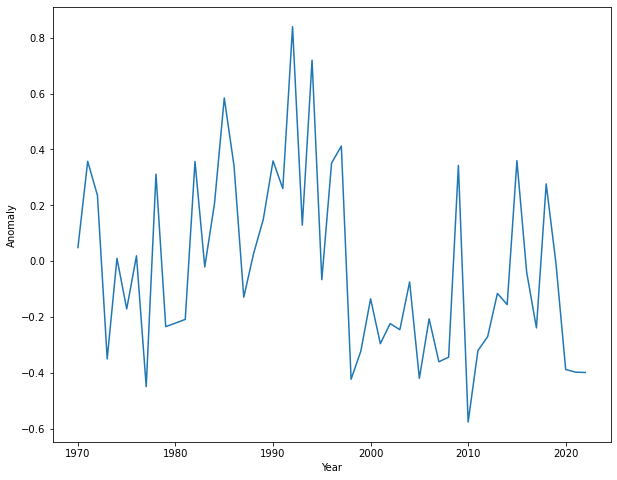

In [167]:
# 3.10
# Extract the first 4 characters to fill the new column"YEAR"
df3_6new["YEAR"]=df3_6new["cDayofyear"].str[0:4]
# Calculate the anomaly of daily counts at annual resolution groupby "Year"
print(df3_6new.groupby("YEAR")["Anomaly"].mean())
df3_6new.groupby("YEAR")["Anomaly"].mean().plot(figsize=(10, 8))
plt.xlabel("Year")
plt.ylabel("Anomaly")
# 1985,1992 and 1994 stand out as having anomalous hurricane activity, so did 2010, but in a minus Anomaly.